In [1]:
# split and process data
import Functions

train_size = 0.75
val_size = 0.10
test_size = 0.15

y_train, y_val, y_test, X_train, X_val, X_test = Functions.getSplittedData(['Charge', 'Mass', 'NumAtoms', 'FractionSP3', 'NumRotatableBonds', 'Length'], train_size, val_size, test_size)


In [2]:
print("Numbers of samples in the splits")
print(f"Train Groups: {len(y_train)}")
print(f"Validation Groups: {len(y_val)}")
print(f"Test Groups: {len(y_test)}")
print(f"Total: {len(y_test)+len(y_train)+len(y_val)}")

Numbers of samples in the splits
Train Groups: 108095
Validation Groups: 14405
Test Groups: 21613
Total: 144113


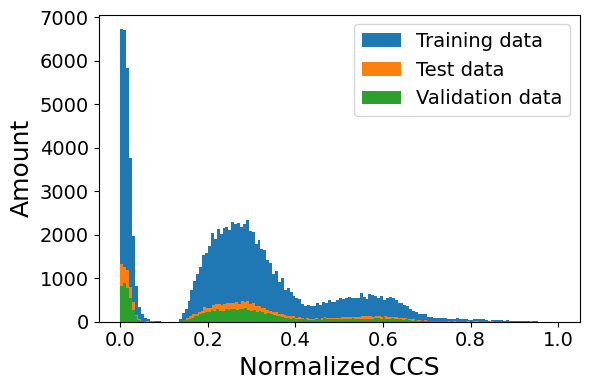

In [3]:
# plot distribution of CCS
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

plt.hist(y_train, label="Training data", bins=150)
plt.hist(y_test, label= "Test data", bins=150)
plt.hist(y_val, label= "Validation data", bins=150)

#plt.title("Distribution of the splitted dataset", fontsize=18)
plt.ylabel("Amount",fontsize=18)
plt.xlabel("Normalized CCS", fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("Normalized CCS.png", dpi=300)
plt.show()

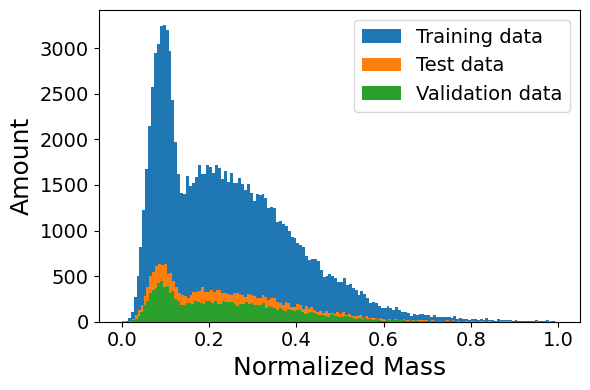

In [4]:
# plot distribution of Mass
plt.figure(figsize=(6, 4))
plt.hist(X_train["Mass"], label="Training data", bins=150)
plt.hist(X_test["Mass"], label= "Test data", bins=150)
plt.hist(X_val["Mass"], label= "Validation data", bins=150)
#plt.title("Distribution of the splitted dataset", fontsize=18)
plt.ylabel("Amount",fontsize=18)
plt.xlabel("Normalized Mass", fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("Normalized Mass.png", dpi=300)
plt.show()

Mean Squared Error: 0.0035794972505442868
Mean Absolute Error: 0.044417540448902545
R² Score: 0.905712179716302


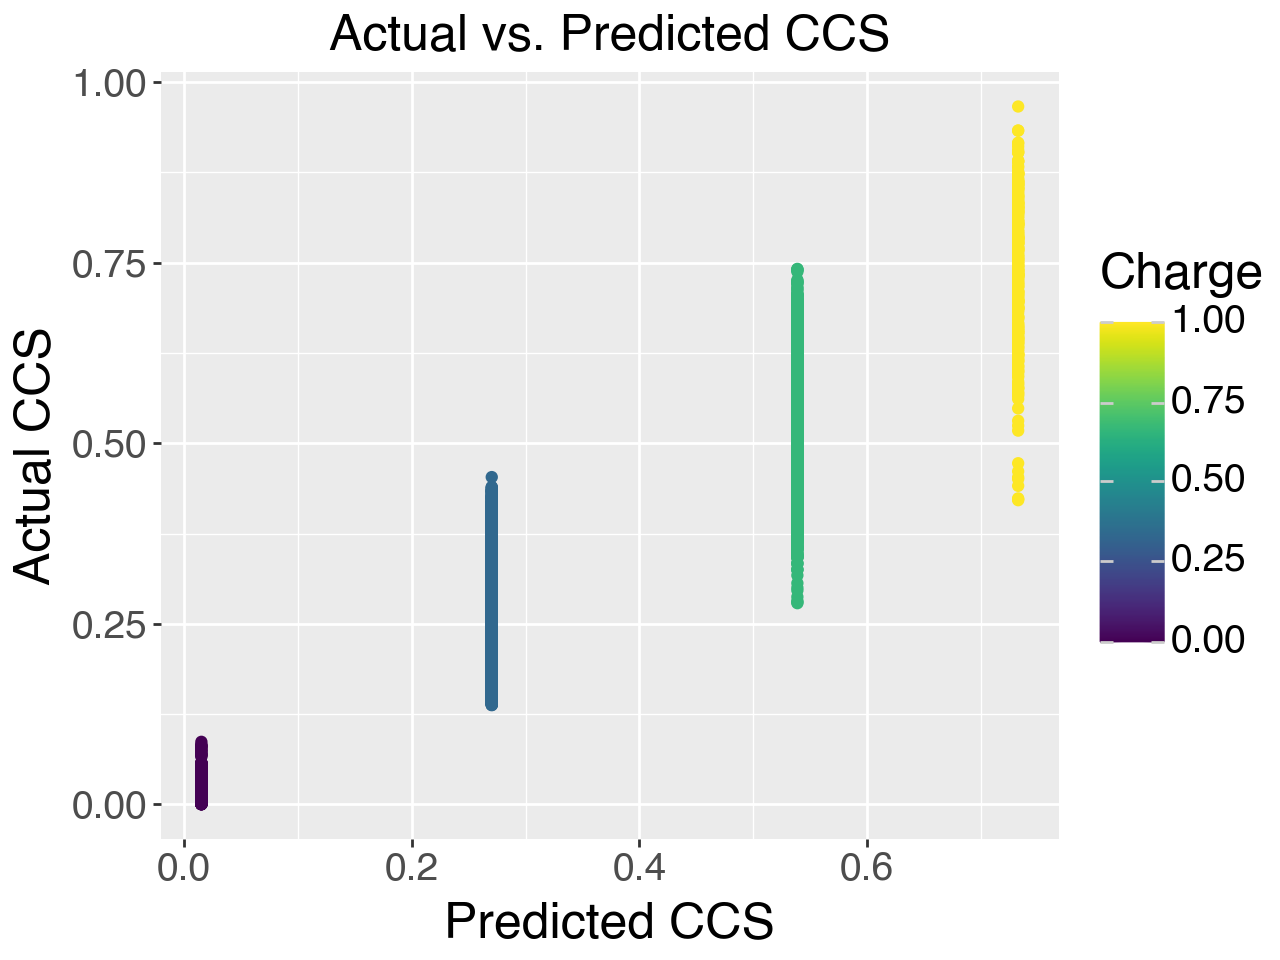

In [6]:
# Model for baseline prediction with Charge
# train first model
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

cur_features = ['Charge']

modelBaseline = RandomForestRegressor(n_estimators=10, random_state=42)
modelBaseline.fit(X_train[cur_features], y_train.ravel())

# evaluate  model
y_pred = modelBaseline.predict(X_val[cur_features])
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
from matplotlib.pyplot import hist

from plotnine import ggplot, aes, geom_point, labs, scale_color_brewer, scale_color_distiller, scale_fill_gradient, theme, element_text

df= pd.DataFrame()
df['Charge'] = X_val['Charge']
df['CCS_pred'] = y_pred
df['CCS_actual'] = y_val
(
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)

Mean Squared Error: 0.000399721241347341
Mean Absolute Error: 0.011565036098543993
R² Score: 0.9894709111560279


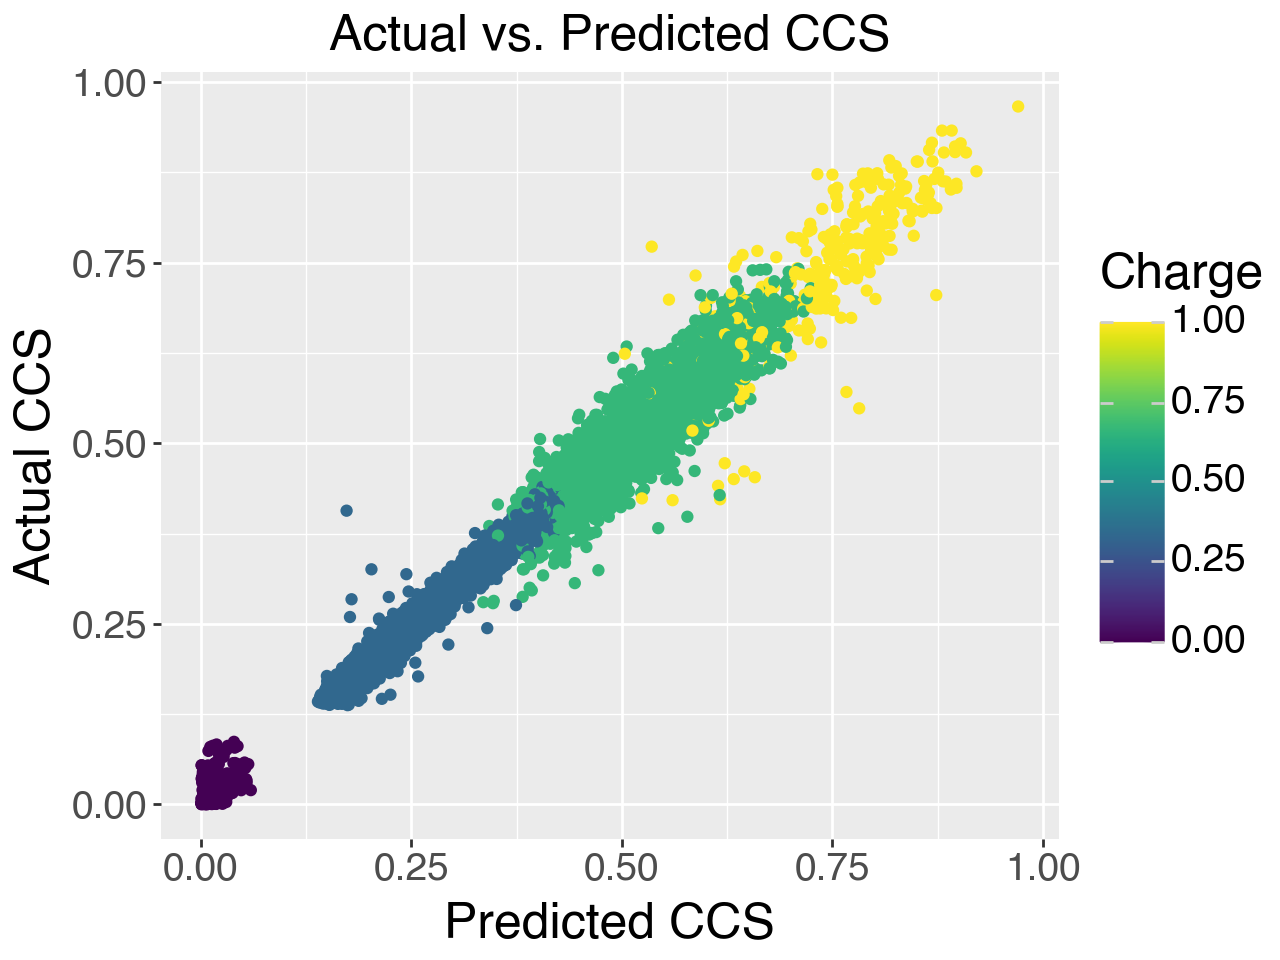

In [7]:
# Model with all relevant features
# ['Charge', 'Mass', 'Length', 'NumRotatableBonds', 'NumAtoms', 'FractionSP3']


cur_features = ['Charge', 'Mass', 'Length', 'NumRotatableBonds', 'NumAtoms', 'FractionSP3']

modelAll = RandomForestRegressor(n_estimators=10, random_state=42)
modelAll.fit(X_train[cur_features], y_train.ravel())

# evaluate model
y_pred = modelAll.predict(X_val[cur_features])
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

df= pd.DataFrame()
df['Charge'] = X_val['Charge']
df['CCS_pred'] = y_pred
df['CCS_actual'] = y_val
(
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)

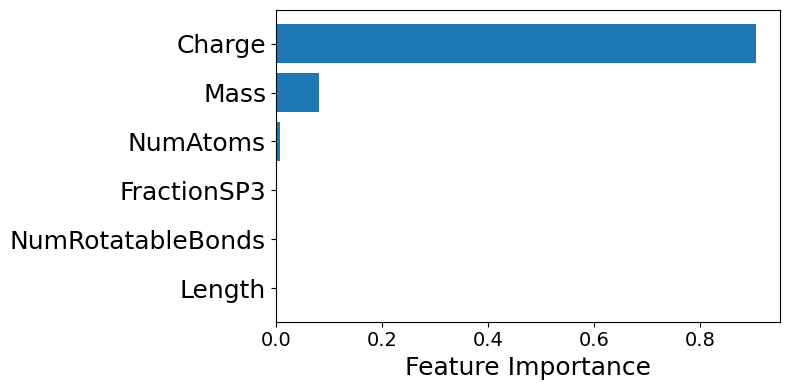

,feature,importance
0,Charge,0.905850
1,Mass,0.080589
4,NumAtoms,0.008206
5,FractionSP3,0.002841
3,NumRotatableBonds,0.001583
2,Length,0.000930


In [8]:

# Extract feature importances
importances = modelAll.feature_importances_
feature_names = ['Charge', 'Mass', 'Length', 'NumRotatableBonds', 'NumAtoms', 'FractionSP3']

# Sort the features by importance
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance', fontsize=18)
#plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Reverse order to have the most important at the top
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig("FeatureImportance.png", dpi=300)
plt.show()

feature_importances

Mean Squared Error: 0.0004638001686418511
Mean Absolute Error: 0.012140187127769899
R² Score: 0.987783003062287


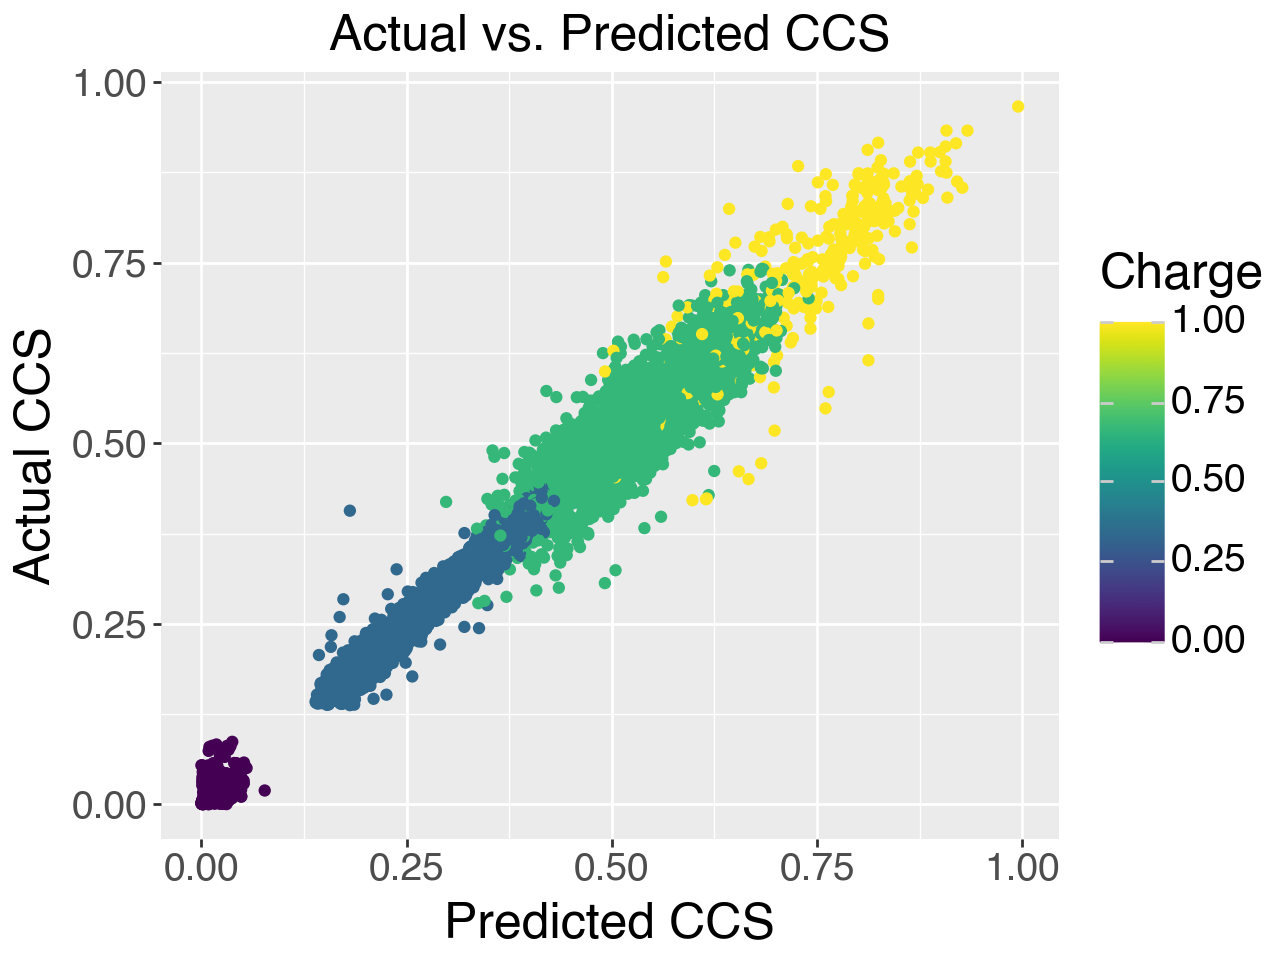

In [9]:
# Model with all relevant features
# ['Charge', 'Mass', 'Length', 'NumRotatableBonds', 'NumAtoms', 'FractionSP3']

cur_features = ['Charge', 'Mass']

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train[cur_features], y_train.ravel())

# evaluate model
y_pred = model.predict(X_val[cur_features])
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

df= pd.DataFrame()
df['Charge'] = X_val['Charge']
df['CCS_pred'] = y_pred
df['CCS_actual'] = y_val
(
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)


In [10]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [11]:

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': list(range(1,25)),
    'max_depth': list(range(1,30)),
    'min_samples_split': list(range(1,10)),
    'max_features': list(range(1,10)),
    'min_samples_leaf': list(range(1,15))
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train.ravel())

print("Beste Parameter:", random_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packag

Beste Parameter: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': 6, 'max_depth': 25}


In [12]:
# evaluate optimized model

# Output results from cross-validation
best_model = random_search.best_estimator_
scores = cross_val_score(best_model, X_train, y_train.ravel(), cv=5, scoring='r2')
print("Cross-validation scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

# Output results from testing
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Cross-validation scores for each fold: [0.99066052 0.99032225 0.99047379 0.99041832 0.99081435]
Mean cross-validation score: 0.9905378444480017
Mean Squared Error: 0.0003683743246306423
Mean Absolute Error: 0.010947070777831623
R² Score: 0.9903276360210491


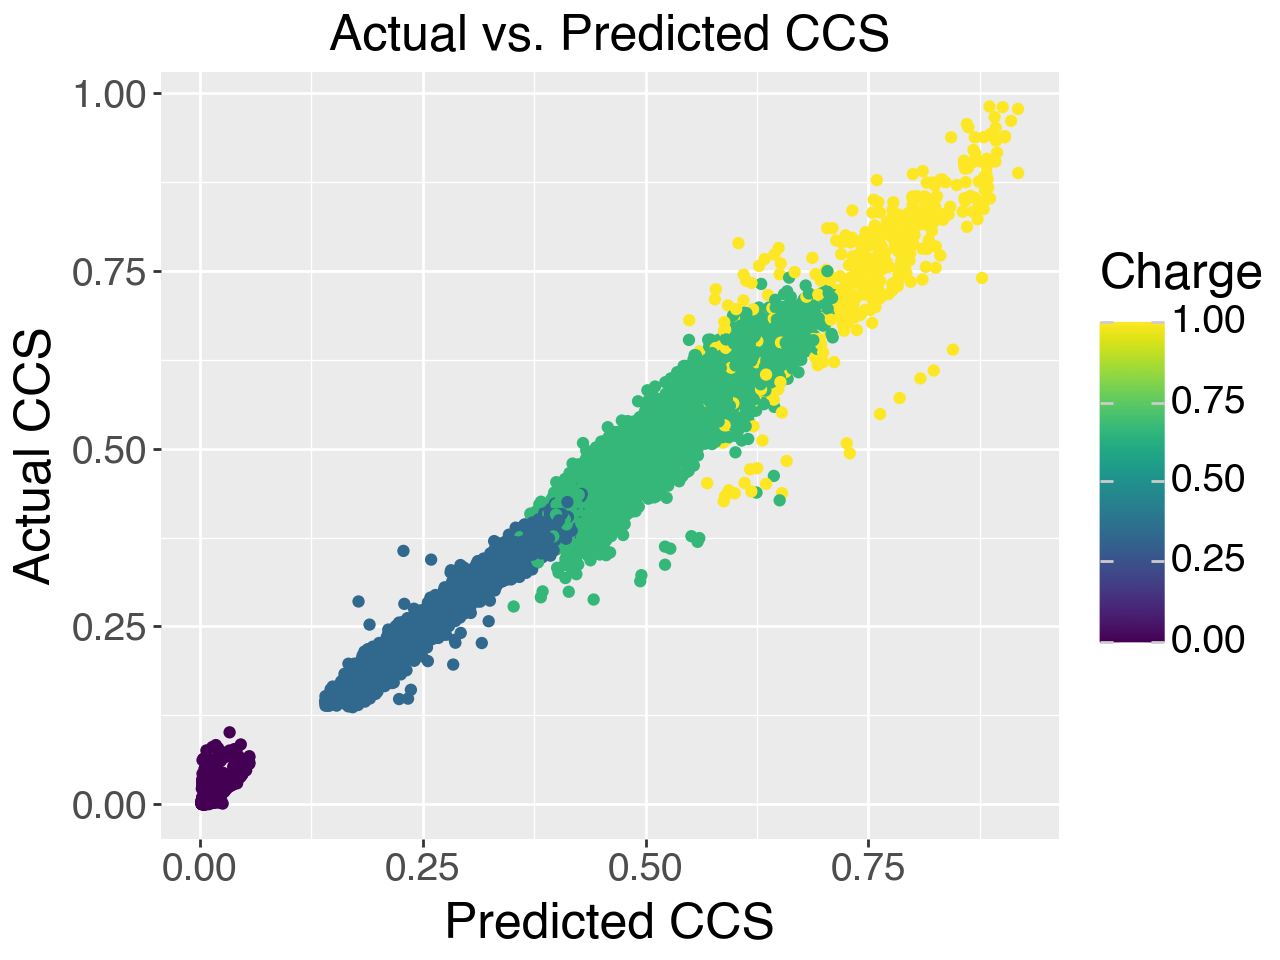

In [13]:
from plotnine import ggplot, aes, geom_point, labs, scale_color_brewer, scale_color_distiller, scale_fill_gradient, theme, element_text

df= pd.DataFrame()
df['Charge'] = X_test['Charge']
df['CCS_pred'] = y_pred
df['CCS_actual'] = y_test
(
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(
   estimator=best_model, X=X_train, y=y_train.ravel(), train_sizes=[10,100,1000,10000,50000], cv=5, scoring='r2', verbose=2, random_state=42)

In [ ]:
from sklearn.model_selection import ValidationCurveDisplay

#'neg_mean_squared_error'

ValidationCurveDisplay.from_estimator(
   best_model, X_train, y_train.ravel(), param_name="n_estimators", param_range=list(range(1,25)), scoring='r2', verbose=2)